#### **Imports and variables**

In [1]:
import os
import time
from representative_subset import greedy_representative_subset, greedy_representative_subset_v2, global_alignment_score, score
from data_io import parse_fasta, write_fasta
from alignment_viewer import view_alignment
import random
from Bio import AlignIO, SeqIO
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import panel as pn
import panel.widgets as pnw
pn.extension()

In [2]:
datasets_folder = './data'
aligned_datasets = {
    'H1N1': 'H1N1_Aligned.fasta',
    'H3N2': 'H3N2_Aligned.fasta',
    'H5N1': 'H5N1_Aligned.fasta',
    'H9N2': 'H9N2_Aligned.fasta',
}
unaligned_datasets = {
    'H1N1': 'H1N1_Seg4.fasta',
    'H3N2': 'H3N2_Seg4.fasta',
}

#### **Compare Algorithm 1 vs Algorithm 2 with aligned sequences**

In [3]:
for dataset in aligned_datasets:
    print(f"Dataset {dataset}:")
    input_path = os.path.join(datasets_folder, aligned_datasets[dataset])    
    sequences = parse_fasta(input_path)
    print("\tExtracting representative subset using Algorithm 1...")
    init = time.time()
    subset = greedy_representative_subset(sequences)
    end = time.time()
    print(f"\tExtracted {len(subset)} representative sequences from {len(sequences)} in {end-init} seconds.")
    print("\tExtracting representative subset using Algorithm 2...")
    init = time.time()
    subset_v2 = greedy_representative_subset_v2(sequences)
    end = time.time()
    print(f"\tExtracted {len(subset_v2)} representative sequences from {len(sequences)} input sequences in {end-init} seconds.")

Dataset H1N1:
	Extracting representative subset using Algorithm 1...


100%|█████████████████████████████████████| 2028/2028 [00:01<00:00, 1264.73it/s]


	Extracted 10 representative sequences from 2028 in 1.6220788955688477 seconds.
	Extracting representative subset using Algorithm 2...


100%|███████████████████████████████████████| 2028/2028 [09:53<00:00,  3.42it/s]


	Extracted 10 representative sequences from 2028 input sequences in 597.4331140518188 seconds.
Dataset H3N2:
	Extracting representative subset using Algorithm 1...


100%|█████████████████████████████████████| 1431/1431 [00:01<00:00, 1010.14it/s]


	Extracted 6 representative sequences from 1431 in 1.420003890991211 seconds.
	Extracting representative subset using Algorithm 2...


100%|███████████████████████████████████████| 1431/1431 [04:51<00:00,  4.91it/s]


	Extracted 6 representative sequences from 1431 input sequences in 292.7379038333893 seconds.
Dataset H5N1:
	Extracting representative subset using Algorithm 1...


100%|██████████████████████████████████████| 1793/1793 [00:02<00:00, 789.18it/s]


	Extracted 57 representative sequences from 1793 in 2.340078830718994 seconds.
	Extracting representative subset using Algorithm 2...


100%|███████████████████████████████████████| 1793/1793 [07:48<00:00,  3.83it/s]


	Extracted 50 representative sequences from 1793 input sequences in 483.2029902935028 seconds.
Dataset H9N2:
	Extracting representative subset using Algorithm 1...


100%|██████████████████████████████████████| 2924/2924 [00:09<00:00, 310.61it/s]


	Extracted 166 representative sequences from 2924 in 9.918664932250977 seconds.
	Extracting representative subset using Algorithm 2...


100%|███████████████████████████████████████| 2924/2924 [20:31<00:00,  2.37it/s]


	Extracted 135 representative sequences from 2924 input sequences in 1336.290301322937 seconds.


#### **Compare Algorithm 1 with/without aligned inputs**

In [4]:
for dataset in unaligned_datasets:
    print(f"Dataset {dataset}:")
    input_path = os.path.join(datasets_folder, unaligned_datasets[dataset])    
    sequences = parse_fasta(input_path)
    print("\tExtracting representative subset using Algorithm 1 without aligned sequences...")
    init = time.time()
    subset_v2 = greedy_representative_subset(sequences, aligned=False)
    end = time.time()
    print(f"\tExtracted {len(subset)} representative sequences from {len(sequences)} input sequences in {end-init} seconds.")

Dataset H1N1:
	Extracting representative subset using Algorithm 1 without aligned sequences...


100%|█████████████████████████████████████| 2028/2028 [2:44:40<00:00,  4.87s/it]


	Extracted 166 representative sequences from 2028 input sequences in 9882.432312011719 seconds.
Dataset H3N2:
	Extracting representative subset using Algorithm 1 without aligned sequences...


100%|█████████████████████████████████████| 1431/1431 [1:06:23<00:00,  2.78s/it]

	Extracted 166 representative sequences from 1431 input sequences in 3983.5353651046753 seconds.


#### **Benchmarking**

In [12]:
subset_list = []
test_list = []
for dataset in aligned_datasets:
    print(f"Dataset {dataset}:")
    input_path = os.path.join(datasets_folder, aligned_datasets[dataset])
    output_path = os.path.join(datasets_folder, aligned_datasets[dataset].replace(".fasta", "_Subset.fasta"))
    sequences = parse_fasta(input_path)
    print("\tSplitting training and testing sets...")
    testing_indices = random.choices(list(range(len(sequences))), k=len(sequences)//10)
    training_set = [sequences[i] for i in range(len(sequences)) if i not in testing_indices]
    testing_set = [sequences[i] for i in testing_indices]
    test_list.append(testing_set)
    print("\tExtracting representative subset using Algorithm 1...")
    init = time.time()
    subset = greedy_representative_subset(training_set)
    subset_list.append(subset)
    end = time.time()
    print(f"\tExtracted {len(subset)} representative sequences from {len(training_set)} input sequences in {end-init} seconds.")
    print("Done! \n")

accuracy_score = 0
test_size = 50
size = sum([test_size for i in test_list])
for i in range(len(test_list)):
    test = random.sample(test_list[i], 50)
    d_temp = len(test[0])*75//100
    subset = subset_list[i]
    for j in tqdm(range(test_size)):
        for k in subset:
            temp = global_alignment_score(test[j].replace('-', ''),k.replace('-', ''))
            if(temp>=d_temp):
                accuracy_score += 1
                break
print(f"Subset Accuracy: {accuracy_score/size}")

Dataset H1N1:
	Splitting training and testing sets...
	Extracting representative subset using Algorithm 1...


100%|█████████████████████████████████████| 1833/1833 [00:00<00:00, 3792.93it/s]


	Extracted 9 representative sequences from 1833 input sequences in 0.6655817031860352 seconds.
Done! 

Dataset H3N2:
	Splitting training and testing sets...
	Extracting representative subset using Algorithm 1...


100%|█████████████████████████████████████| 1298/1298 [00:00<00:00, 2087.92it/s]


	Extracted 6 representative sequences from 1298 input sequences in 0.6236400604248047 seconds.
Done! 

Dataset H5N1:
	Splitting training and testing sets...
	Extracting representative subset using Algorithm 1...


100%|█████████████████████████████████████| 1621/1621 [00:00<00:00, 3625.67it/s]


	Extracted 50 representative sequences from 1621 input sequences in 0.46515822410583496 seconds.
Done! 

Dataset H9N2:
	Splitting training and testing sets...
	Extracting representative subset using Algorithm 1...


100%|██████████████████████████████████████| 2653/2653 [00:12<00:00, 206.05it/s]


	Extracted 151 representative sequences from 2653 input sequences in 13.217833995819092 seconds.
Done! 



100%|█████████████████████████████████████████| 50/50 [1:11:49<00:00, 86.19s/it]

Subset Accuracy: 0.97


#### **Analyze how ranging the delta parameter changes the results of the subset size**

In [6]:
ds = np.arange(25, 91, 1)
results = {}
for dataset in aligned_datasets:
    print(f"Dataset {dataset}:")
    input_path = os.path.join(datasets_folder, aligned_datasets[dataset])    
    sequences = parse_fasta(input_path)
    l_s = len(sequences[0])
    d_list = []
    subset_size_list = []
    for d in ds:
        this_d = l_s * d // 100
        subset = greedy_representative_subset(sequences, d = this_d)
        d_list.append(d)
        subset_size_list.append(len(subset))
    results[dataset] = [d_list, subset_size_list]

Dataset H1N1:


100%|██████████████████████████████████████| 2028/2028 [00:02<00:00, 827.22it/s]


Dataset H3N2:


100%|█████████████████████████████████████| 1431/1431 [00:00<00:00, 3288.04it/s]


Dataset H5N1:


100%|███████████████████████████████████████| 1793/1793 [00:39<00:00, 45.67it/s]


Dataset H9N2:


100%|███████████████████████████████████████| 2924/2924 [03:44<00:00, 13.04it/s]


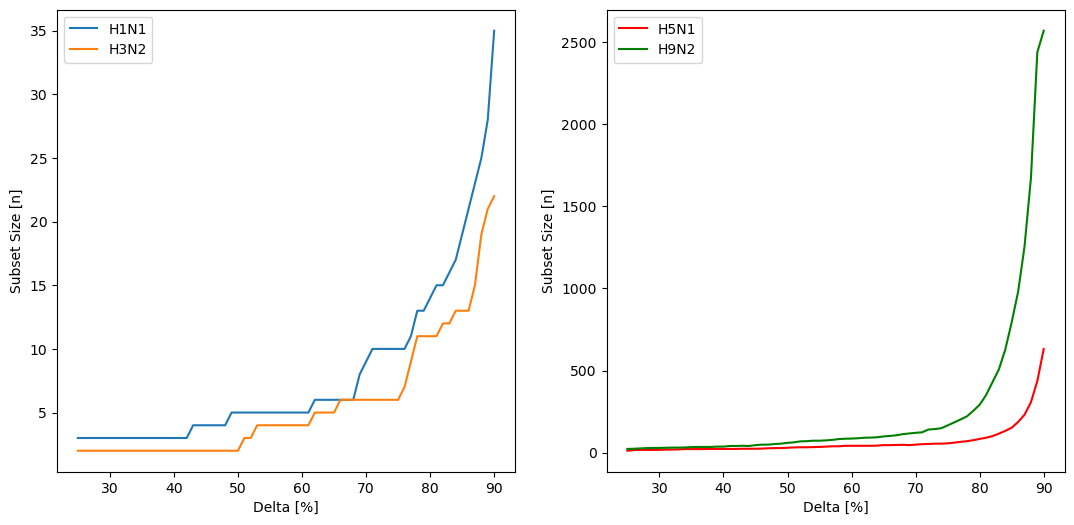

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13, 6))
ax1.plot(results["H1N1"][0], results["H1N1"][1], label = "H1N1")
ax1.plot(results["H3N2"][0], results["H3N2"][1], label = "H3N2")
ax1.set_xlabel("Delta [%]")
ax1.set_ylabel("Subset Size [n]")
ax1.legend()
ax2.plot(results["H5N1"][0], results["H5N1"][1], color = "red", label = "H5N1")
ax2.plot(results["H9N2"][0], results["H9N2"][1], color = "green", label = "H9N2")
ax2.legend()
ax2.set_xlabel("Delta [%]")
ax2.set_ylabel("Subset Size [n]")
plt.show()

#### **Analyzing how changes to the match rewward and mismatch and indel penalites alter the construction of the represenative subset**

In [3]:
mrs = np.arange(1, 11, 1)
mps = np.arange(0, 11, 1)
ips = np.arange(0, 11, 1)
mr_mp_results = [[0]*11 for _ in range(10)]
mr_ip_results = [[0]*11 for _ in range(10)]
mp_ip_results = [[0]*11 for _ in range(11)]
input_path = os.path.join(datasets_folder, aligned_datasets["H1N1"])    
sequences = parse_fasta(input_path)
for m_r in mrs:
    for m_p in mps:
        subset = greedy_representative_subset(sequences, mr = m_r, mp = m_p)
        mr_mp_results[m_r-1][m_p] = len(subset)
    for i_p in ips:
        subset = greedy_representative_subset(sequences, mr = m_r, ip = i_p)
        mr_ip_results[m_r-1][i_p] = len(subset)
for m_p in mps:
    for i_p in ips:
        subset = greedy_representative_subset(sequences, mp = m_p, ip = i_p)
        mp_ip_results[m_p][i_p] = len(subset)

100%|██████████| 2028/2028 [00:14<00:00, 142.99it/s]


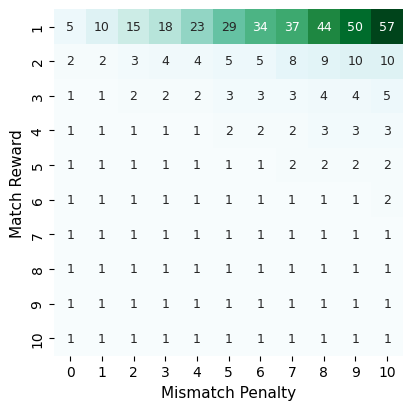

In [18]:
fig, ax = plt.subplots(figsize=(4.5,4.5))
df = pd.DataFrame(mr_mp_results, columns = range(0,11), index = range(1,11))
g = sns.heatmap(df, annot = True, fmt = '.3g', annot_kws={"size": 9}, cbar = None, cmap = "BuGn")
g.set_ylabel("Match Reward", fontsize = 11)
g.set_xlabel("Mismatch Penalty", fontsize = 11)
plt.show()

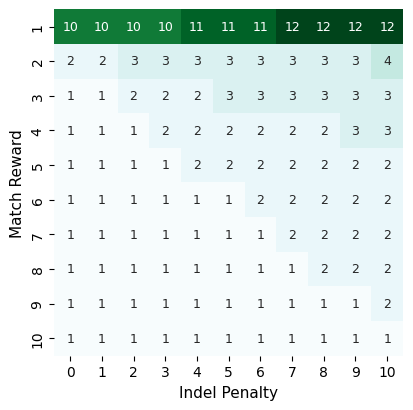

In [19]:
fig, ax = plt.subplots(figsize=(4.5,4.5))
df = pd.DataFrame(mr_ip_results, columns = range(0,11), index = range(1,11))
g = sns.heatmap(df, annot = True, fmt = '.3g', annot_kws={"size": 9}, cbar = None, cmap = "BuGn")
g.set_ylabel("Match Reward", fontsize = 11)
g.set_xlabel("Indel Penalty", fontsize = 11)
plt.show()

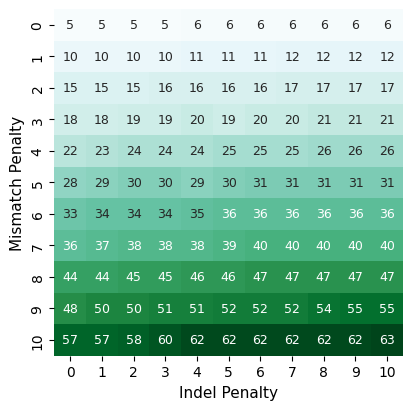

In [20]:
fig, ax = plt.subplots(figsize=(4.5,4.5))
df = pd.DataFrame(mp_ip_results, columns = range(0,11), index = range(0,11))
g = sns.heatmap(df, annot = True, fmt = '.3g', annot_kws={"size": 9}, cbar = None, cmap = "BuGn")
g.set_ylabel("Mismatch Penalty", fontsize = 11)
g.set_xlabel("Indel Penalty", fontsize = 11)
plt.show()

#### **Visualizing Representative Subsets**

##### H1N1

In [ ]:
aln = AlignIO.read('data/H1N1_Alg1_Subset.fasta','fasta')
p = view_alignment(aln, plot_width=900)
pn.pane.Bokeh(p)

##### H3N2

In [ ]:
aln = AlignIO.read('data/H3N2_Alg1_Subset.fasta','fasta')
p = view_alignment(aln, plot_width=900)
pn.pane.Bokeh(p)